In [1]:
from librerias import *

In [2]:
ruta_archivo = 'Data/btc_limp.csv' 

btc = pd.read_csv(ruta_archivo)
btc.set_index('Date', inplace=True)

In [3]:
btc.index = pd.to_datetime(btc.index)
btc_mes = btc.asfreq('YS', method='ffill')
btc_mes = btc_mes.loc['2014-01-01':]


In [4]:

# Mostrar el DataFrame resultante
btc_mes = btc_mes ['Open']
btc_mes = pd.DataFrame (btc_mes)

In [5]:

btc_sin_up = btc_mes.copy ()
btc_sin_up = pd.DataFrame (btc_sin_up)
btc_sin_up.index = pd.to_datetime(btc_sin_up.index)

btc_down = btc_mes.copy ()
btc_down = pd.DataFrame (btc_down)
btc_down.index = pd.to_datetime(btc_down.index)

btc_sin_up_down = btc_mes.copy ()
btc_sin_up_down = pd.DataFrame (btc_sin_up_down)
btc_sin_up_down.index = pd.to_datetime(btc_sin_up_down.index)

In [6]:
btc_mes ['retornos']= btc_mes ['Open'].pct_change ().round (2)

btc_mes ['ganancias'] = (1 + btc_mes['retornos']).cumprod()

btc_mes

,Open,retornos,ganancias
Date,,,
2014-01-01,805,NaN,NaN
2015-01-01,318,-0.60,0.400000
2016-01-01,430,0.35,0.540000
2017-01-01,963,1.24,1.209600
2018-01-01,13850,13.38,17.394048
2019-01-01,3709,-0.73,4.696393
2020-01-01,7196,0.94,9.111002
2021-01-01,28951,3.02,36.626229
2022-01-01,46217,0.60,58.601967


In [7]:
mejores = btc_mes.loc[btc_mes['retornos'].nlargest(5).index]
peores = btc_mes.loc[btc_mes['retornos'].nsmallest(5).index]

In [8]:
mejores

,Open,retornos,ganancias
Date,,,
2018-01-01,13850,13.38,17.394048
2021-01-01,28951,3.02,36.626229
2024-01-01,42272,1.56,54.007573
2017-01-01,963,1.24,1.209600
2020-01-01,7196,0.94,9.111002


In [9]:
peores

,Open,retornos,ganancias
Date,,,
2019-01-01,3709,-0.73,4.696393
2023-01-01,16537,-0.64,21.096708
2015-01-01,318,-0.60,0.400000
2016-01-01,430,0.35,0.540000
2022-01-01,46217,0.60,58.601967


In [10]:
btc_sin_up = btc_sin_up.drop(mejores.index)
btc_sin_up ['retornos']= btc_sin_up ['Open'].pct_change ().round (2)
btc_sin_up ['ganancias'] = (1 + btc_sin_up['retornos']).cumprod().round (2)
btc_sin_up


,Open,retornos,ganancias
Date,,,
2014-01-01,805,NaN,NaN
2015-01-01,318,-0.60,0.40
2016-01-01,430,0.35,0.54
2019-01-01,3709,7.63,4.66
2022-01-01,46217,11.46,58.07
2023-01-01,16537,-0.64,20.90


In [11]:
btc_down = btc_down.drop(peores.index)
btc_down ['retornos']= btc_down ['Open'].pct_change ().round (2)
btc_down ['ganancias'] = (1 + btc_down['retornos']).cumprod().round (2)
btc_down.dropna ()


,Open,retornos,ganancias
Date,,,
2017-01-01,963,0.20,1.20
2018-01-01,13850,13.38,17.26
2020-01-01,7196,-0.48,8.97
2021-01-01,28951,3.02,36.07
2024-01-01,42272,0.46,52.67


In [12]:
btc_sin_up_down = btc_sin_up_down.drop(peores.index).dropna ()
btc_sin_up_down = btc_sin_up_down.drop (mejores.index).dropna ()
btc_sin_up_down ['retornos']= btc_sin_up_down ['Open'].pct_change ().round (2)
btc_sin_up_down ['ganancias'] = (1 + btc_sin_up_down['retornos']).cumprod().round (2)
btc_sin_up_down.dropna ()

,Open,retornos,ganancias
Date,,,


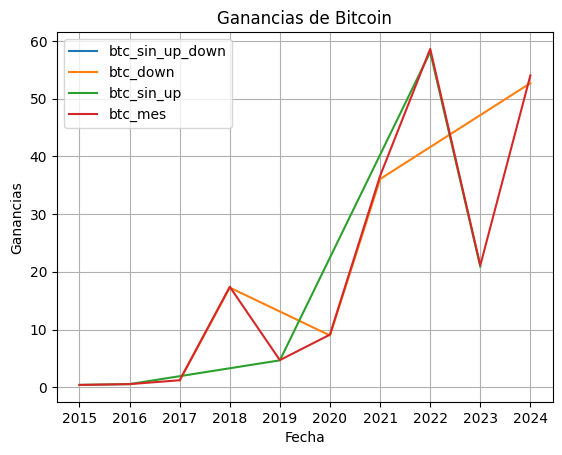

In [13]:
import matplotlib.pyplot as plt

# Graficar btc_sin_up_down
plt.plot(btc_sin_up_down.index, btc_sin_up_down['ganancias'], label='btc_sin_up_down')

# Graficar btc_down
plt.plot(btc_down.index, btc_down['ganancias'], label='btc_down')

# Graficar btc_sin_up
plt.plot(btc_sin_up.index, btc_sin_up['ganancias'], label='btc_sin_up')

# Graficar btc_mes
plt.plot(btc_mes.index, btc_mes['ganancias'], label='btc_mes')

# Configurar leyenda y etiquetas
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Ganancias')
plt.title('Ganancias de Bitcoin')
plt.grid(True)

# Mostrar gráfico
plt.show()


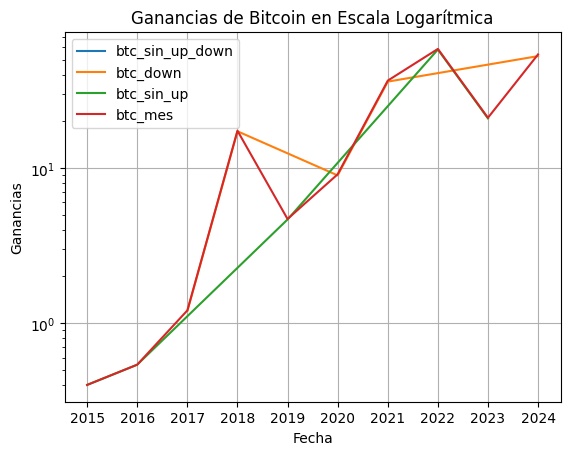

In [14]:
import matplotlib.pyplot as plt

# Graficar btc_sin_up_down
plt.plot(btc_sin_up_down.index, btc_sin_up_down['ganancias'], label='btc_sin_up_down')

# Graficar btc_down
plt.plot(btc_down.index, btc_down['ganancias'], label='btc_down')

# Graficar btc_sin_up
plt.plot(btc_sin_up.index, btc_sin_up['ganancias'], label='btc_sin_up')

# Graficar btc_mes
plt.plot(btc_mes.index, btc_mes['ganancias'], label='btc_mes')

# Configurar leyenda y etiquetas
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Ganancias')
plt.title('Ganancias de Bitcoin en Escala Logarítmica')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.grid(True)

# Mostrar gráfico
plt.show()
